# Import packages

In [18]:
import json
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Check images that are frequently included in neurons' stimiuli

In [26]:
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

def gen_img_dist(stimulus):
    imgs = {}
    for layer in stimulus:
        for neuron_stimulus in stimulus[layer]:
            for img in neuron_stimulus:
                if img not in imgs:
                    imgs[img] = 0
                imgs[img] += 1
    return imgs

def show_imgs(img_idxs):
    for img_idx in img_idxs:
        img = raw_training_datasets[img_idx][0]
        img = np.einsum('kij->ijk', img)
        plt.title(f'img: {img_idx}')
        plt.imshow(img)
        plt.show()

### Raw training images

In [13]:
raw_data_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

raw_training_datasets = datasets.ImageFolder(
    '../../../../ILSVRC2012/train',
    raw_data_transform
)

### VGG19_pretrained

In [8]:
base_stimulus_path = '/raid/NeuEvo/data/stimulus/vgg19_pretrained/data/stimulus-topk_s=20.json'
stimulus_base = load_json(base_stimulus_path)
imgs_base = gen_img_dist(stimulus_base)

top10_imgs_base = dict(sorted(imgs_base.items(), key=lambda item: item[1], reverse=True)[:10])
top10_imgs_base

{784514: 230,
 1025288: 148,
 951139: 105,
 1026015: 98,
 1025838: 90,
 892463: 88,
 1025873: 86,
 1025745: 79,
 823333: 76,
 1111710: 75}

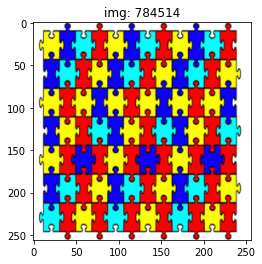

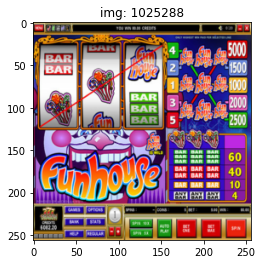

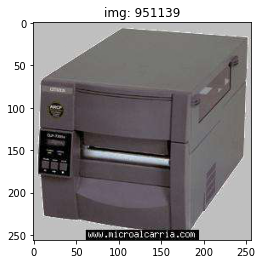

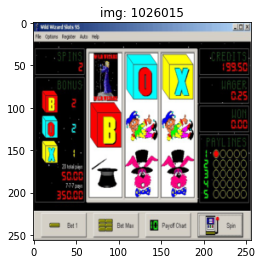

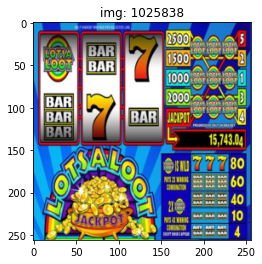

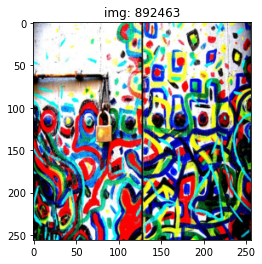

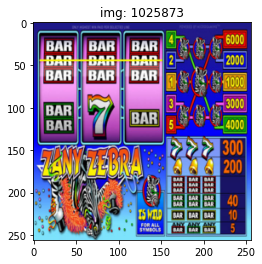

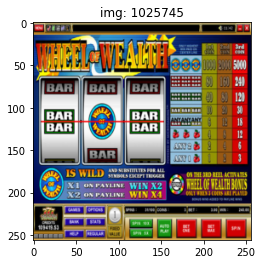

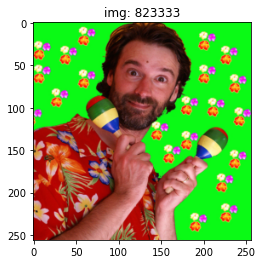

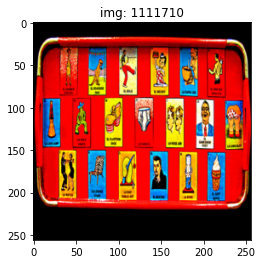

In [27]:
show_imgs(top10_imgs_base)

### ConvNeXt-96

In [23]:
convnext_stimulus_path = '/raid/NeuEvo/data/stimulus/convnext-0.004-96/data/stimulus-topk_s=20.json'
stimulus_convnext = load_json(convnext_stimulus_path)
imgs_convnext = gen_img_dist(stimulus_convnext)

top10_imgs_convnext = dict(sorted(imgs_convnext.items(), key=lambda item: item[1], reverse=True)[:10])
top10_imgs_convnext

{15588: 230,
 913086: 188,
 252709: 176,
 716346: 151,
 240304: 142,
 986216: 140,
 619110: 126,
 1212522: 126,
 177588: 116,
 214467: 109}

In [106]:
stimulus_convnext['Conv2d_128'][477]

[154441,
 737019,
 1048654,
 174206,
 714141,
 750793,
 964529,
 5454,
 1163453,
 397104,
 1263360,
 827288,
 1261153,
 769103,
 884674,
 1003163,
 681816,
 133996,
 5149,
 1214929]

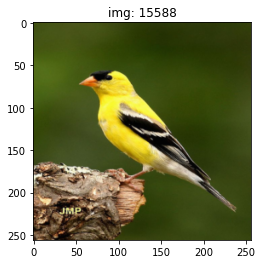

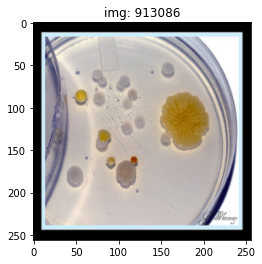

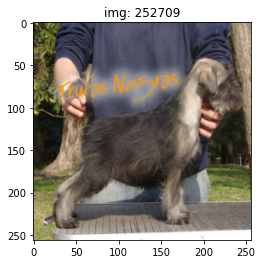

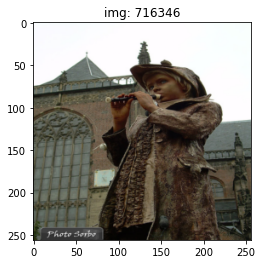

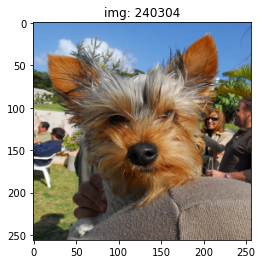

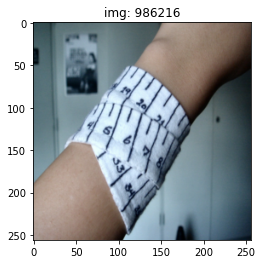

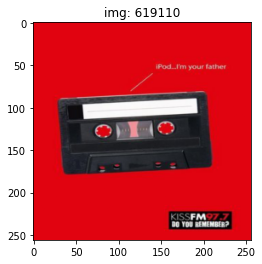

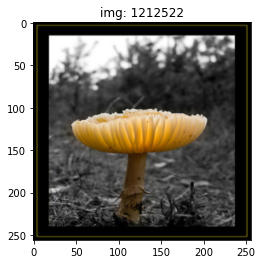

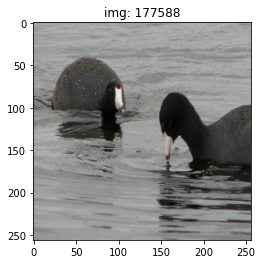

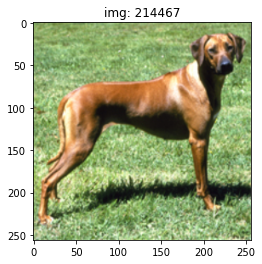

In [28]:
show_imgs(top10_imgs_convnext)

# A neuron's stimulus

### VGG19_pretrained

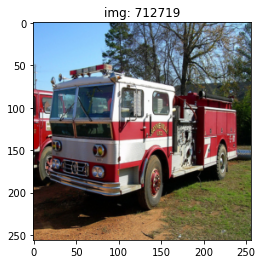

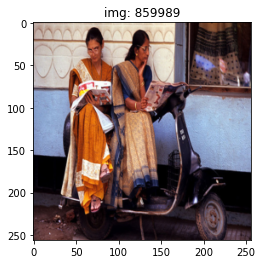

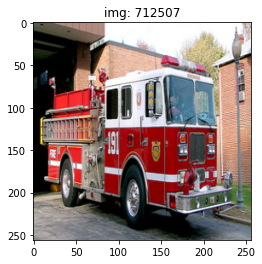

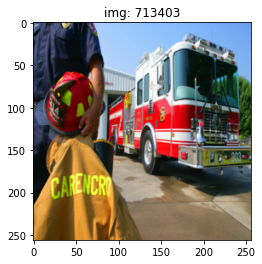

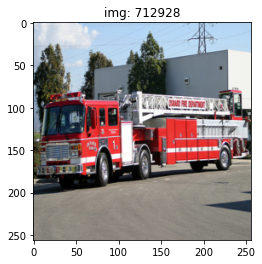

In [54]:
# vgg19_neuron_stimulus = [303121, 349585, 349198, 349852, 324482, 323375, 336571, 348779, 336980, 336787, 372025, 323676, 301582, 323499, 302744, 324085, 348754, 222794, 323692, 221644]
vgg19_neuron_stimulus = [712719, 859989, 712507, 713403, 712928, 713196, 842273, 712773, 1118955, 1074164, 1010775, 302633, 713114, 1119715, 788097, 739226, 712506, 659635, 514428, 712576]
show_imgs(vgg19_neuron_stimulus[:5])

### Vgg16-0

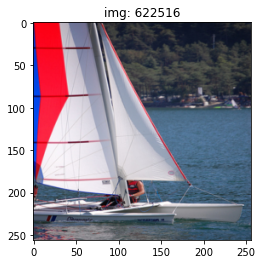

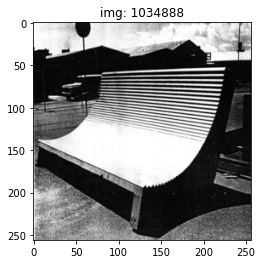

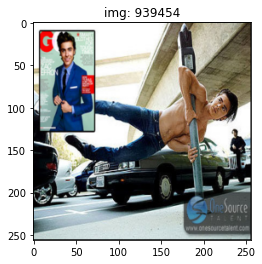

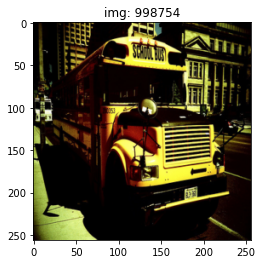

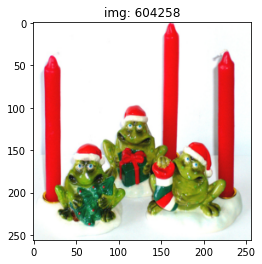

In [66]:
neuron_stimulus = [622516, 1034888, 939454, 998754, 604258, 1265824, 944589, 1126722, 414412, 590317, 574168, 599849, 1215351, 173453, 751317, 1181982, 824441, 24597, 997938, 394278]
show_imgs(neuron_stimulus[:5])

### Vgg16-7

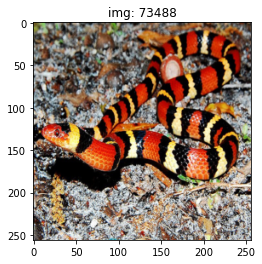

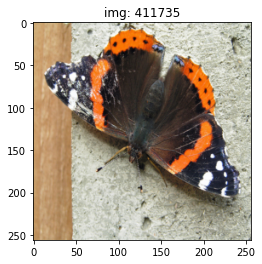

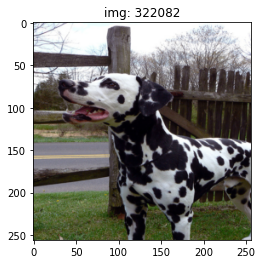

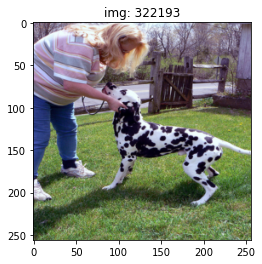

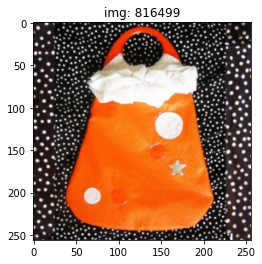

In [68]:
neuron_stimulus = [73488, 411735, 322082, 322193, 816499, 385131, 389256, 73144, 32939, 685172, 411803, 73346, 72729, 33317, 315123, 414288, 58713, 1187372, 32787, 72944]
show_imgs(neuron_stimulus[:5])

### ConvNext-96

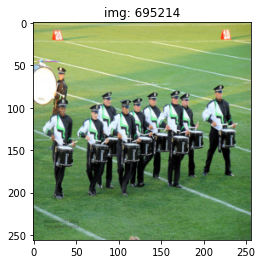

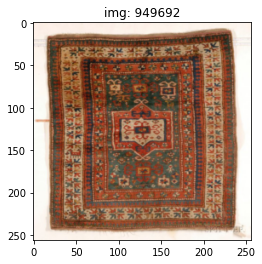

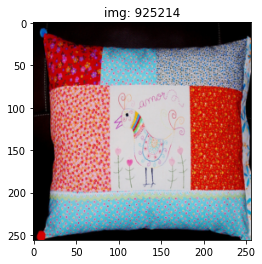

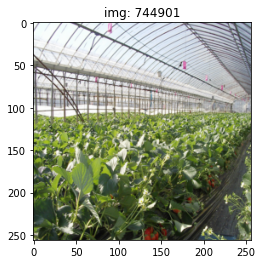

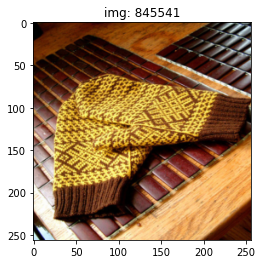

In [87]:
# convnext_neuron_stimulus = [100230, 1159170, 990052, 1034921, 1099688, 1223081, 901366, 123586, 647995, 1243537, 684614, 1160032, 419499, 1057713, 627580, 808359, 995876, 1099513, 652365, 36172]
convnext_neuron_stimulus = [695214, 949692, 925214, 744901, 845541, 1159517, 679796, 967826, 87429, 716346, 1144779, 530075, 214467, 941561, 949056, 271927, 246664, 934092, 652473, 1263920]
show_imgs(convnext_neuron_stimulus[:5])